# **CARGA DE TRAIN Y TEST**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
x_train=pd.read_excel('09-x_train-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('09-x_test-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('09-y_train-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('09-y_test-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [ ]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **NORMALIZACION DE CARACTERISTICAS**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [ ]:
x_train_std

array([[ 0.14460028,  0.69528193, -0.24056216, ..., -0.3763997 ,
        -0.22253434,  0.33347571],
       [-0.62206494, -0.79568757,  0.76221206, ...,  0.36340816,
         0.11927483, -0.12087326],
       [-0.78591565, -0.19862985,  0.18601115, ..., -0.91071673,
        -0.65086369, -0.18338165],
       ...,
       [-0.10863039, -0.04406574, -0.7096609 , ..., -0.36777285,
         0.2318171 ,  0.90393937],
       [ 3.38103404,  0.88980525, -0.94838801, ...,  2.91093573,
        -1.68037233,  1.06354128],
       [-0.84218273, -0.57611737,  0.46516346, ..., -0.83320015,
        -0.50027804, -0.20316768]])

# **MODELO DE MARCHINE LEARNING**

In [ ]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11776     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_train)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)#1000
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#1000 70
#1000 67
#1250 69
#1300 66
#995 68

Epoch 1/800
73/73 [==============================] - 2s 5ms/step - loss: 1.0146 - accuracy: 0.5586
Epoch 2/800
73/73 [==============================] - 0s 5ms/step - loss: 0.8940 - accuracy: 0.6131
Epoch 3/800
73/73 [==============================] - 0s 4ms/step - loss: 0.8447 - accuracy: 0.6347
Epoch 4/800
73/73 [==============================] - 0s 5ms/step - loss: 0.8297 - accuracy: 0.6546
Epoch 5/800
73/73 [==============================] - 0s 4ms/step - loss: 0.7902 - accuracy: 0.6610
Epoch 6/800
73/73 [==============================] - 0s 4ms/step - loss: 0.7665 - accuracy: 0.6662
Epoch 7/800
73/73 [==============================] - 0s 4ms/step - loss: 0.7403 - accuracy: 0.6896
Epoch 8/800
73/73 [==============================] - 0s 4ms/step - loss: 0.7158 - accuracy: 0.6909
Epoch 9/800
73/73 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.7125
Epoch 10/800
73/73 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.7233
Epoch 11/

array([2, 3, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 2, 3, 3, 1, 3, 3, 3, 2, 0, 2,
       2, 1, 3, 0, 2, 2, 2, 1, 2, 3, 1, 2, 3, 1, 2, 0, 2, 3, 3, 0, 0, 3,
       2, 2, 3, 1, 0, 2, 1, 1, 1, 3, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 3,
       2, 2, 0, 2, 3, 0, 3, 1, 1, 0, 3, 1, 2, 3, 2, 3, 2, 2, 2, 0, 0, 2,
       2, 3, 1, 2, 1, 3, 3, 3, 2, 0, 2, 2, 2, 3, 0, 2, 3, 1, 3, 2, 1, 3,
       1, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 2, 1, 3, 2, 1, 3,
       0, 3, 2, 3, 3, 1, 3, 1, 0, 3, 3, 1, 3, 0, 0, 0, 2, 2, 3, 0, 2, 2,
       3, 2, 2, 2, 3, 1, 0, 3, 2, 2, 2, 2, 3, 2, 0, 3, 2, 2, 1, 2, 2, 1,
       0, 0, 3, 0, 1, 0, 2, 0, 1, 3, 1, 3, 2, 1, 3, 3, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 3, 1, 1, 1, 3, 2, 2, 0, 2, 0, 3, 0, 1, 3, 1, 2, 2, 2,
       0, 2, 3, 2, 2, 2, 2, 3, 0, 2, 0, 2, 3, 2, 3, 3, 0, 2, 3, 3, 0, 2,
       2, 2, 2, 2, 3, 2, 0, 3, 0, 1, 3, 1, 3, 3, 2, 3, 2, 2, 3, 2, 3, 0,
       1, 0, 0, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 1,
       0, 2, 2, 0, 3, 3, 1, 1, 2, 0, 3, 2, 0, 3, 0,

# **EVALUACION**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        81
           1       0.47      0.41      0.44        97
           2       0.69      0.64      0.66       241
           3       0.62      0.69      0.65       160

    accuracy                           0.63       579
   macro avg       0.61      0.62      0.61       579
weighted avg       0.63      0.63      0.63       579



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        81
           1       0.47      0.41      0.44        97
           2       0.69      0.64      0.66       241
           3       0.62      0.69      0.65       160

    accuracy                           0.63       579
   macro avg       0.61      0.62      0.61       579
weighted avg       0.63      0.63      0.63       579

Matriz de confusión, sin normalización
[[ 59   8  10   4]
 [ 17  40  24  16]
 [ 10  27 155  49]
 [  2  10  37 111]]


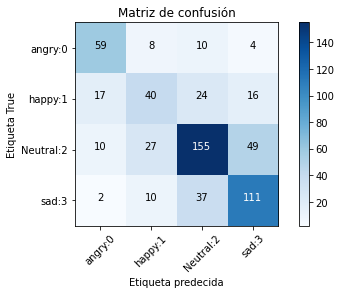

In [ ]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')